In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Customer_Churn_Analysis.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


There are total 7043 columns and 21 rows in the dataset.

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are total 18 columns with object data type, 1 with float and 2 with int data type.

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataset.

Checking the value counts for different columns.

In [5]:
df['customerID'].value_counts()

2560-PPCHE    1
6631-HMANX    1
3714-XPXBW    1
9025-ZRPVR    1
0793-TWELN    1
             ..
3570-YUEKJ    1
1442-OKRJE    1
9027-YFHQJ    1
7831-QGOXH    1
8480-PPONV    1
Name: customerID, Length: 7043, dtype: int64

Dropping this column as we have index values in the dataset.

In [6]:
df.drop(['customerID'],axis=1,inplace=True)

In [7]:
df.shape

(7043, 20)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [10]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [12]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [13]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [14]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [15]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [16]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [17]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [18]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [19]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [20]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [21]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [23]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [25]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
3124.5      1
1311.75     1
2934.3      1
620.35      1
2555.05     1
Name: TotalCharges, Length: 6531, dtype: int64

In [26]:
df['TotalCharges'].isnull().sum()

0

In [27]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Class imbalance is there in target variable.

We have no internet service as common value in many columns as the dataset is related to Internet also.

We will drop TotalCharges column as we already have MonthlyCharges column in dataset.

In [28]:
df.drop('TotalCharges',axis=1,inplace=True)

In [29]:
df.shape

(7043, 19)

We are going to proceed with 7043 rows and 19 columns.

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We got statistical summary for 3 columns only as those are in numeric format, we will get sumaary for other columns in next steps.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='count'>

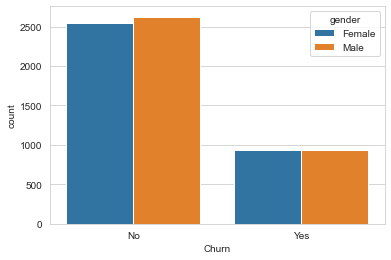

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='gender',data=df)

Same churn rate is there for both male and female category.

<AxesSubplot:xlabel='Churn', ylabel='count'>

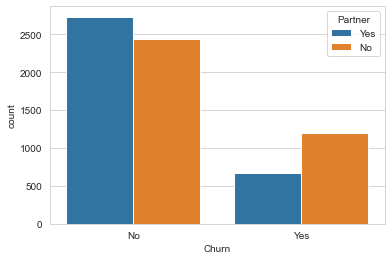

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Partner',data=df)

Churn rate is high for category who do not have any partner and it is low for the category who have partner.

<AxesSubplot:xlabel='Churn', ylabel='count'>

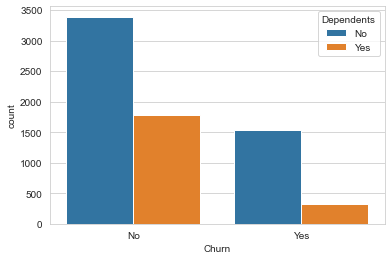

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Dependents',data=df)

Category with no dependents have higher churn rate.

<AxesSubplot:xlabel='Churn', ylabel='count'>

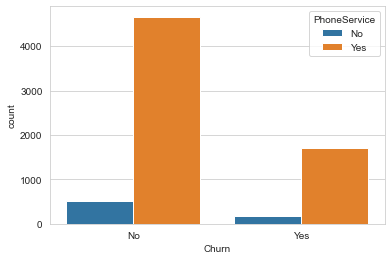

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PhoneService',data=df)

Churn rate is high and low for the category who uses phoneservice.

<AxesSubplot:xlabel='Churn', ylabel='count'>

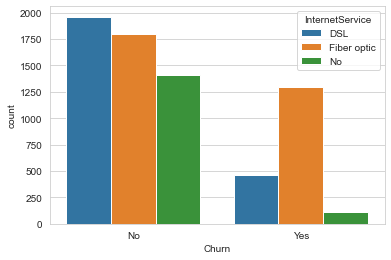

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='InternetService',data=df)

For the people who using FiberOptic(InternetService), more attrition is there for them and for DSl category, retention rate is more.

<AxesSubplot:xlabel='Churn', ylabel='count'>

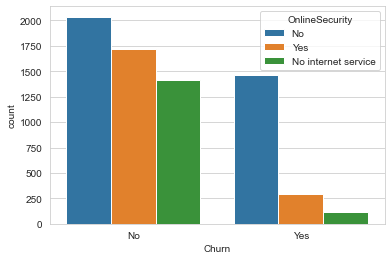

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)

People who do not have any internet security, churn rate is very high for them and even the retention rate is high for the same category.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

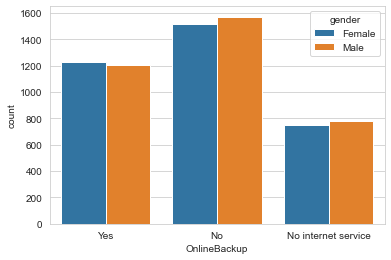

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineBackup',hue='gender',data=df)

Churn rate and retention rate is high and low for the people who do not have online backup.

<AxesSubplot:xlabel='Churn', ylabel='count'>

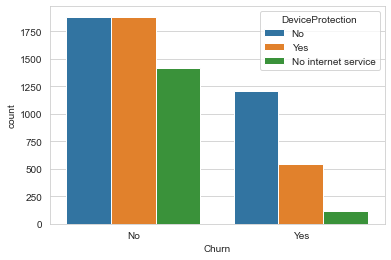

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='DeviceProtection',data=df)

People who do not have any device protection, churn ate is high for them and retention rate is highest and equal for device protection yes and no category. 

<AxesSubplot:xlabel='Churn', ylabel='count'>

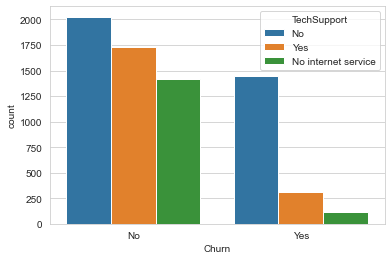

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='TechSupport',data=df)

People who are not having any tech support, churn(attrition) rate is high for them and retention rate is high for the same category.

<AxesSubplot:xlabel='Churn', ylabel='count'>

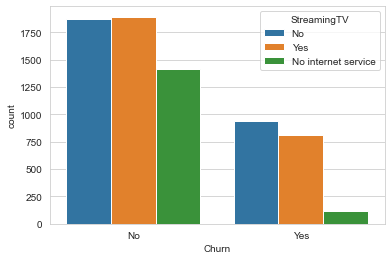

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingTV',data=df)

People who do not uses streaming TV having highest churn rate and People who uses it having highest Retention Rate.

<AxesSubplot:xlabel='Churn', ylabel='count'>

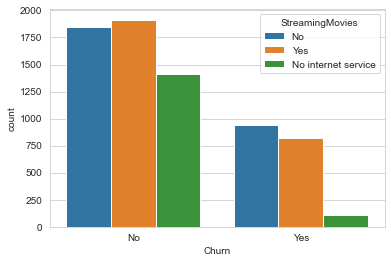

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingMovies',data=df)

Churn rate is highest for the category of people who has not Streaming Movies and the retention rate is high for Category of people who has Streaming Movies.

<AxesSubplot:xlabel='Churn', ylabel='count'>

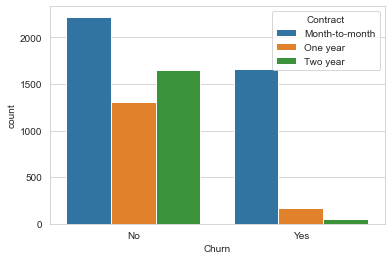

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Contract',data=df)

People having Month-to-Month contract having the highest churn rate and highest retention rate as maximum people belongs to this category itself.

<AxesSubplot:xlabel='Churn', ylabel='count'>

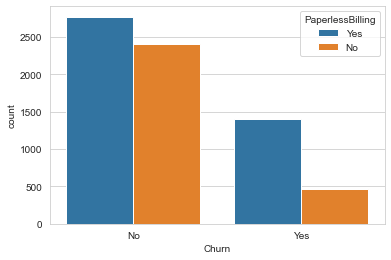

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)

As the count of PaperlessBill users is more, their churn and retention rate is the highest.

<AxesSubplot:xlabel='Churn', ylabel='count'>

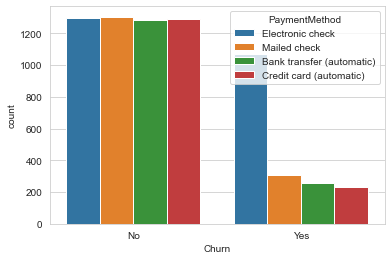

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaymentMethod',data=df)

Churn rate is high for Electronic check users and retention rate is high for Mailed Check category.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

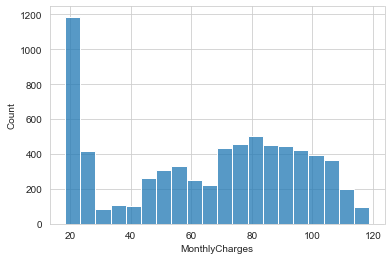

In [47]:
sns.histplot(df['MonthlyCharges'],bins=20)

Most of the users have monthly charges as 20 and the count is 1190, least of the users have monthly charges as (25-30)and the count is near about (50-60) users.

In [48]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

<AxesSubplot:xlabel='tenure', ylabel='Count'>

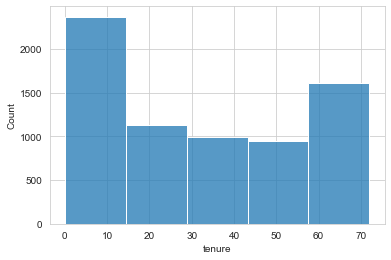

In [49]:
sns.histplot(df['tenure'],bins=5  )

for tenure period between (0 to 15), rate of users is the most(count=2500).

{'bodies': [<matplotlib.collections.PolyCollection at 0x2b12067eee0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2b12067ed30>,
 'cmins': <matplotlib.collections.LineCollection at 0x2b1216603d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2b1216606d0>}

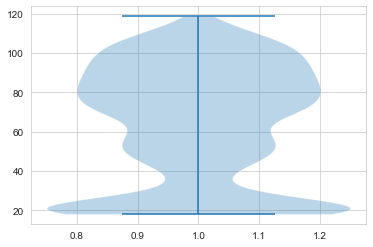

In [50]:
plt.violinplot(df['MonthlyCharges'])

Highest Density of monthly charges is between 87 to 111.

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [54]:
df['gender']=le.fit_transform(df['gender'])

In [55]:
df['Partner']=le.fit_transform(df['Partner'])

In [56]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [57]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [58]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [59]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [60]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Churn']=le.fit_transform(df['Churn'])

In [61]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
Churn                 int32
dtype: object

We encoded all the data for furhter operation.

In [62]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


Above is the statistical summary of the dataset which tells us about missing values,mean,median,max and minimum values for every column.

Checking presence of outliers:

In [63]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

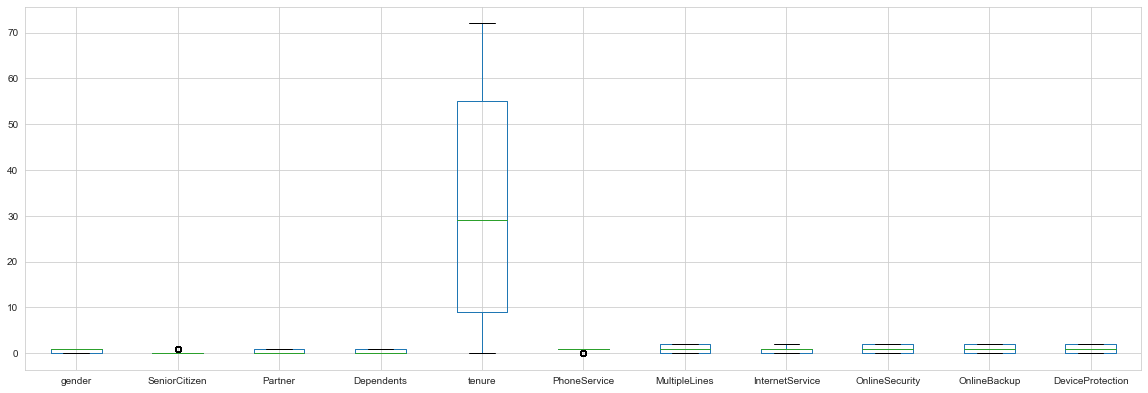

In [64]:
df.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

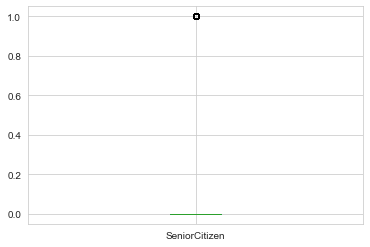

In [65]:
df['SeniorCitizen'].plot.box()

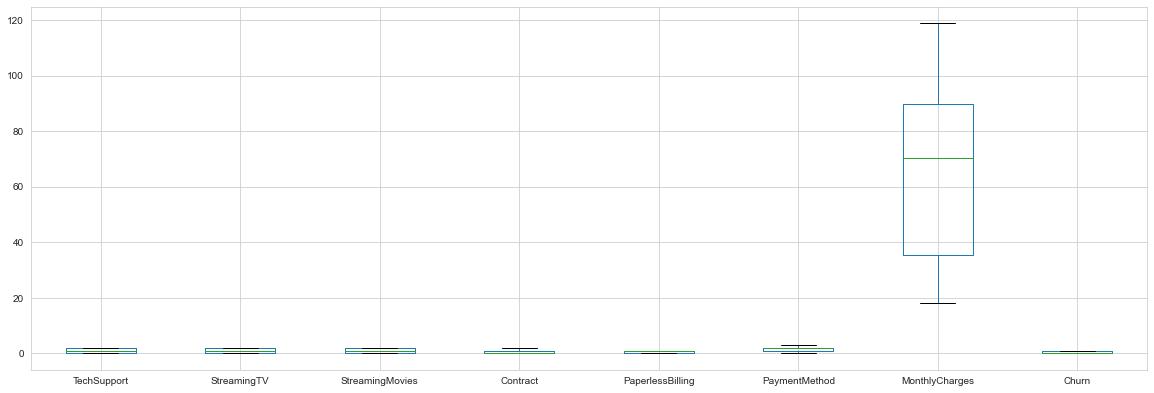

In [66]:
df.iloc[:,11:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Their are very less outliers, we will continue with the same dataset df.

Checking the correlation.

In [67]:
df_cor=df.corr()
df_cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525


<AxesSubplot:>

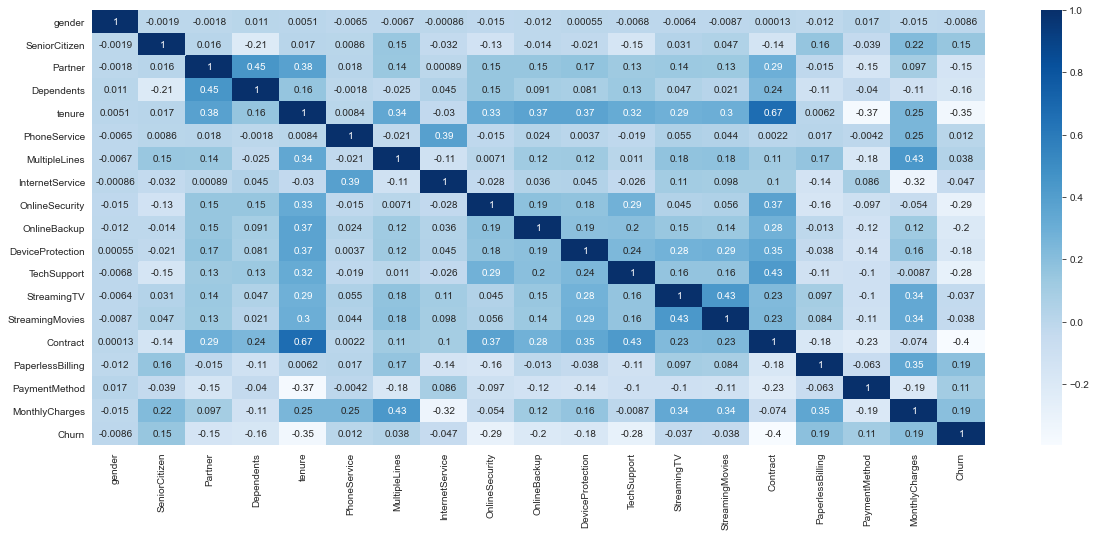

In [68]:
plt.figure(figsize=[20,8])
sns.heatmap(df_cor,cmap='Blues',annot=True)

Columns are positively as well as negatively correlated.

In [69]:
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Highest Correlation with Churn - MonthlyCharges(0.1933)


Lowest Correlation with Churn  - Contract(-0.3967)

Spliting the data into x and y.

In [70]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [71]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


In [72]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [73]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
dtype: float64

as skewness is there in some columns, bt we both are of object adta type, we will continue with the data.(x)

checking the distribution of data.

<AxesSubplot:xlabel='gender', ylabel='Density'>

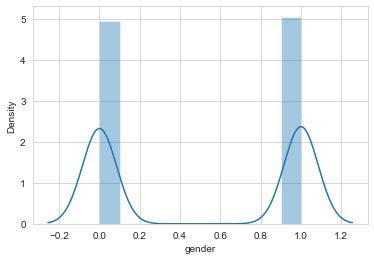

In [74]:
sns.distplot(df['gender'])

Data is normally distributed, then their is slight skewness and then data is again normally distributed.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

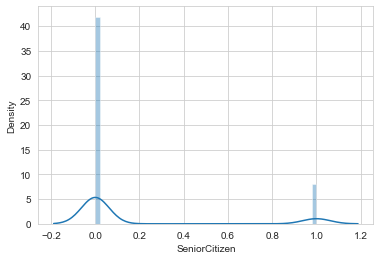

In [77]:
sns.distplot(x['SeniorCitizen'])

Data is right skewed.

<AxesSubplot:xlabel='Partner', ylabel='Density'>

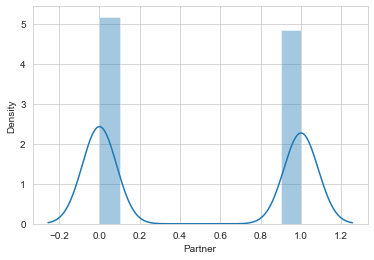

In [78]:
sns.distplot(df['Partner'])

Data is normally distributed.

So, as most of the columns are of obj data type, after encoding them, no need to remove skewness.

In [79]:
from sklearn.preprocessing import MinMaxScaler


In [80]:
mn=MinMaxScaler()

In [82]:
X=mn.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)

In [83]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706


Data is scaled using MinMax Scaler.

Handling Class Imbalance.

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [86]:
X_train.shape

(4930, 18)

In [87]:
X_test.shape

(2113, 18)

In [88]:
y_train.shape

(4930,)

In [89]:
y_test.shape

(2113,)

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X,y)

In [94]:
X_res.shape

(10348, 18)

In [96]:
y_res.shape

(10348,)

In [97]:
from collections import Counter

In [98]:
print('original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

original dataset shapeCounter({0: 5174, 1: 1869})
Resampled dataset shapeCounter({0: 5174, 1: 5174})


Class is balanced now, we can proceed.

Finding the best random state.

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_res_train,X_res_test,y_res_train,y_res_test=train_test_split(X_res,y_res,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_res_train,y_res_train)
    pred=LR.predict(X_res_test)
    acc=accuracy_score(y_res_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        
print("Best accuracy is", maxAccu,"on Random state", maxRs)        
   

Best accuracy is 0.792914653784219 on Random state 124


We are going to create new train_test_split with random state (124)

In [101]:
 X_res_train,X_res_test,y_res_train,y_res_test=train_test_split(X_res,y_res,test_size=.30,random_state=124)

In [111]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [112]:
LR=LogisticRegression()
LR.fit(X_res_train,y_res_train)
pred=LR.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))


0.792914653784219
[[1161  344]
 [ 299 1301]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1505
           1       0.79      0.81      0.80      1600

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [113]:
dt=DecisionTreeClassifier()
dt.fit(X_res_train,y_res_train)
pred=dt.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))


0.7938808373590982
[[1189  316]
 [ 324 1276]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1505
           1       0.80      0.80      0.80      1600

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [114]:
sv=SVC()
sv.fit(X_res_train,y_res_train)
pred=sv.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))


0.8161030595813205
[[1196  309]
 [ 262 1338]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1505
           1       0.81      0.84      0.82      1600

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



In [115]:
gb=GaussianNB()
gb.fit(X_res_train,y_res_train)
pred=gb.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))


0.7835748792270532
[[1127  378]
 [ 294 1306]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1505
           1       0.78      0.82      0.80      1600

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



In [116]:
rf=RandomForestClassifier()
rf.fit(X_res_train,y_res_train)
pred=rf.predict(X_res_test)
print(accuracy_score(y_res_test,pred))
print(confusion_matrix(y_res_test,pred))
print(classification_report(y_res_test,pred))


0.8582930756843801
[[1288  217]
 [ 223 1377]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1505
           1       0.86      0.86      0.86      1600

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



We got accuracies for different models, it might be due to overfitting, we will check cross val score.

In [118]:
#Cross_Validation

scr=cross_val_score(LR,X_res,y_res,cv=5)
print(scr.mean())

0.775997833208416


In [119]:
scr=cross_val_score(dt,X_res,y_res,cv=5)
print(scr.mean())

0.7856696156513333


In [120]:
scr=cross_val_score(rf,X_res,y_res,cv=5)
print(scr.mean())

0.8523490308977942


In [121]:
scr=cross_val_score(gb,X_res,y_res,cv=5)
print(scr.mean())

0.769232680260482


In [122]:
scr=cross_val_score(sv,X_res,y_res,cv=5)
print(scr.mean())

0.8054743242202


As the difference is less for RandomForestRegressor, (ACC and Cross val), we will do Hyperparameter tuning for it.

In [123]:
parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7],
           'criterion':['gini','entropy']}

In [124]:
GCV_rf=GridSearchCV(rf,parameters,cv=5)
GCV_rf.fit(X_res_train,y_res_train)
GCV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [125]:
rf_mod=RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=100)
rf_mod.fit(X_res_train,y_res_train)
pred=rf_mod.predict(X_res_test)
print(accuracy_score(y_res_test,pred))

0.8357487922705314


Final accuracy of the model is 83.57%.

In [126]:
#Model saving
import joblib

In [128]:
joblib.dump(rf_mod,"Churn_Analysis.pkl")

['Churn_Analysis.pkl']

In [129]:
#Model Loading

In [130]:
Final_rf_model=joblib.load('Churn_Analysis.pkl')